In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('fraud_insurance_claims.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [6]:
df.shape

(1000, 39)

In [7]:
df.size

39000

In [8]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [9]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [10]:
len(df)

1000

In [11]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [12]:
df.isnull().sum()/len(df)*100

months_as_customer             0.0
age                            0.0
policy_number                  0.0
policy_bind_date               0.0
policy_state                   0.0
policy_csl                     0.0
policy_deductable              0.0
policy_annual_premium          0.0
umbrella_limit                 0.0
insured_zip                    0.0
insured_sex                    0.0
insured_education_level        0.0
insured_occupation             0.0
insured_hobbies                0.0
insured_relationship           0.0
capital-gains                  0.0
capital-loss                   0.0
incident_date                  0.0
incident_type                  0.0
collision_type                 0.0
incident_severity              0.0
authorities_contacted          0.0
incident_state                 0.0
incident_city                  0.0
incident_location              0.0
incident_hour_of_the_day       0.0
number_of_vehicles_involved    0.0
property_damage                0.0
bodily_injuries     

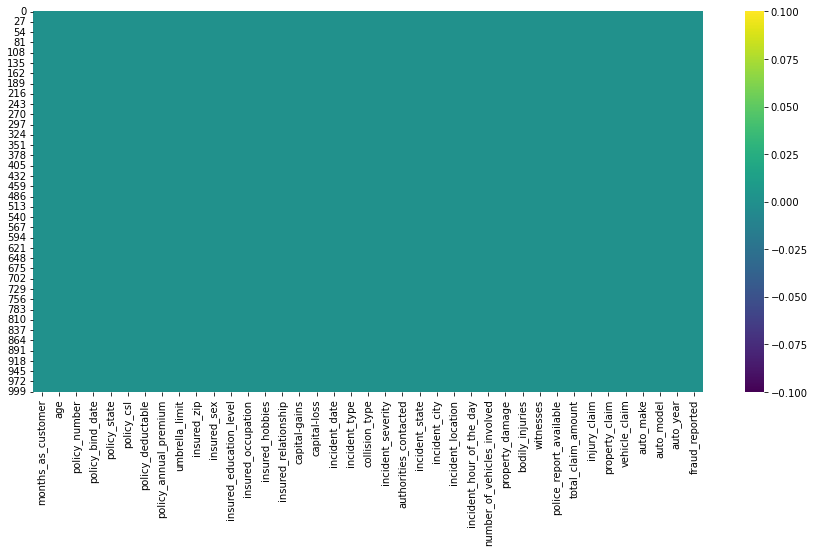

In [13]:
plt.figure(figsize=(15,7))
_=sns.heatmap(df.isnull(),cmap='viridis')

In [14]:
df.drop('policy_number',axis=1,inplace=True)
df.drop('policy_bind_date',axis=1,inplace=True)
df.drop('policy_state',axis=1,inplace=True)
df.drop('insured_zip',axis=1,inplace=True)
df.drop('incident_location',axis=1,inplace=True)
df.drop('incident_state',axis=1,inplace=True)
df.drop('incident_city',axis=1,inplace=True)
df.drop('incident_date',axis=1,inplace=True)
df.drop('auto_make',axis=1,inplace=True)
df.drop('auto_model',axis=1,inplace=True)
df.drop('auto_year',axis=1,inplace=True)

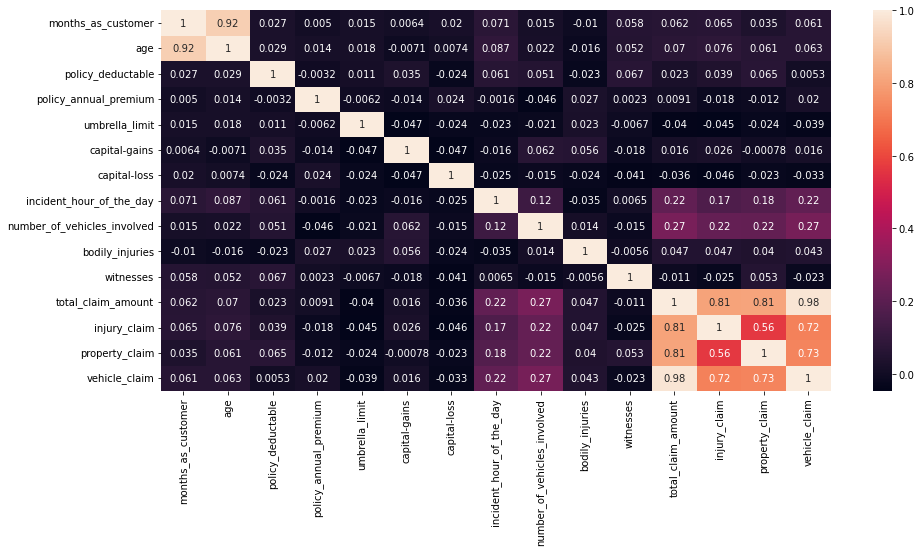

In [15]:
plt.figure(figsize=(15,7))
_=sns.heatmap(df.corr(),annot=True)

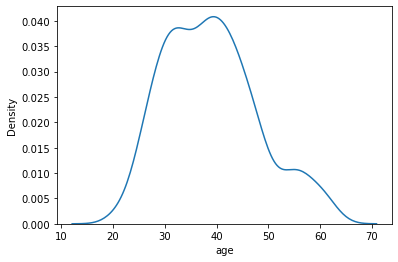

In [16]:
_=sns.kdeplot(x='age',data=df)

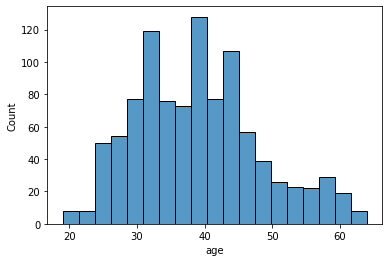

In [17]:
_=sns.histplot(x='age',data=df)

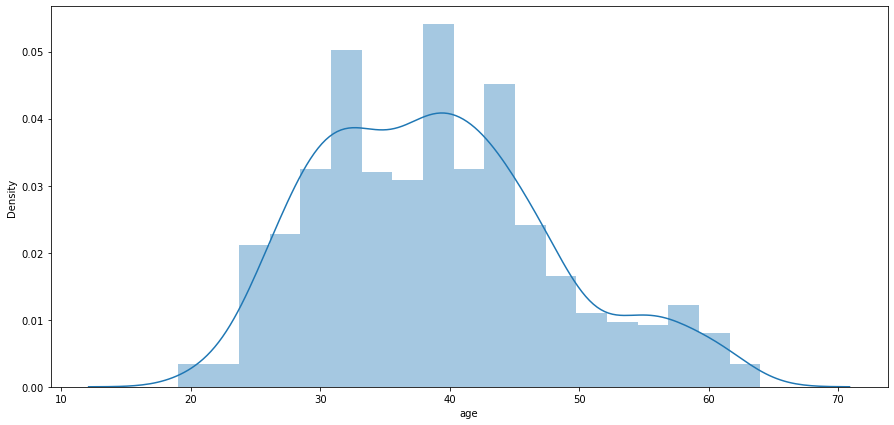

In [18]:
plt.figure(figsize=(15,7))
_=sns.distplot(df['age'])

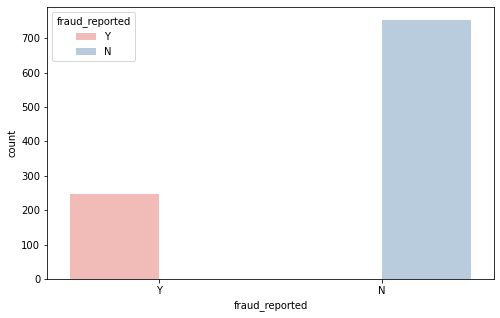

In [19]:
plt.figure(figsize = (8,5))
_=sns.countplot(x ="fraud_reported", data = df, hue ="fraud_reported", palette ="Pastel1" )

In [20]:
df=pd.get_dummies(df,drop_first=True)

In [21]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES,fraud_reported_Y
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,0,0,0,0,1,0,1,0,1,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,0,0,0,1,0,0,0,0,1
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0,0,0,0,1,1,0,1,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0,0,0,0,1,0,0,1,0,1
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,0,1,0,0,1,0,1,0,0


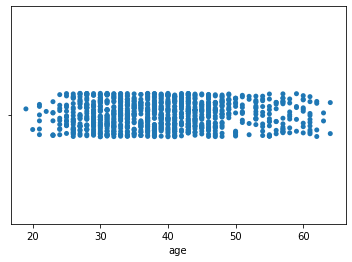

In [22]:
_=sns.stripplot(x='age',data=df)

In [23]:
df['age'].unique()

array([48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 38, 58, 26, 31, 62, 55,
       40, 35, 43, 45, 25, 30, 28, 49, 54, 47, 59, 27, 56, 32, 36, 64, 60,
       51, 46, 50, 57, 53, 24, 52, 19, 21, 63, 20, 22], dtype=int64)

In [24]:
# Spliting into X AND Y# 

In [25]:
x = df.drop('fraud_reported_Y',axis=1)
y = df['fraud_reported_Y']

In [26]:
x

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,0,0,0,0,0,1,0,1,0,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,0,0,0,0,1,0,0,0,0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0,0,0,0,0,1,1,0,1,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0,0,0,0,0,1,0,0,1,0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,1,0,...,0,0,1,0,0,0,0,1,0,0
996,285,41,1000,1436.79,0,70900,0,23,1,2,...,0,0,1,0,0,0,0,1,0,0
997,130,34,500,1383.49,3000000,35100,0,4,3,2,...,0,0,0,0,0,1,0,0,0,1
998,458,62,2000,1356.92,5000000,0,0,2,1,0,...,0,0,0,0,1,0,0,0,0,1


In [27]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported_Y, Length: 1000, dtype: uint8

In [28]:
# Train_test_split

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [30]:
# Feature Scalling

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_train = scaler.transform(x_train)

In [32]:
# Creating Artifical Neural Network

In [33]:
# Importing Libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

In [34]:
x_train.shape

(800, 78)

In [35]:
# Initializing the ANN
ann_clf = Sequential()

In [36]:
#Adding input layer and first hidden layer
ann_clf.add(Dense(activation = 'relu', input_dim = 78, units = 11, kernel_initializer='uniform'))

In [37]:
# Adding Second Hidden Layer
ann_clf.add(Dense(activation ='relu', units = 11, kernel_initializer = 'uniform'))

In [38]:
# Adding Output Layer
ann_clf.add(Dense(activation = 'sigmoid',units = 1, kernel_initializer = 'uniform'))

In [39]:
# Model Compilation
ann_clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
# Model Summary

In [41]:
ann_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                869       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 1,013
Trainable params: 1,013
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Model Training

In [43]:
ann_clf.fit(x_train, y_train, validation_split = 0.33, batch_size = 32,epochs = 50)

Epoch 1/50
17/17 [==============================] - 1s 12ms/step - loss: 0.6902 - accuracy: 0.7556 - val_loss: 0.6862 - val_accuracy: 0.7576
Epoch 2/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6796 - accuracy: 0.7612 - val_loss: 0.6693 - val_accuracy: 0.7576
Epoch 3/50
17/17 [==============================] - 0s 3ms/step - loss: 0.6521 - accuracy: 0.7612 - val_loss: 0.6303 - val_accuracy: 0.7576
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 0.6015 - accuracy: 0.7612 - val_loss: 0.5718 - val_accuracy: 0.7576
Epoch 5/50
17/17 [==============================] - 0s 3ms/step - loss: 0.5488 - accuracy: 0.7612 - val_loss: 0.5418 - val_accuracy: 0.7576
Epoch 6/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5295 - accuracy: 0.7612 - val_loss: 0.5364 - val_accuracy: 0.7576
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5225 - accuracy: 0.7612 - val_loss: 0.5300 - val_accuracy: 0.7576
Epoch 8/50
17/17 [=

In [44]:
# Predicting the test result
y_pred = ann_clf.predict(x_test)
y_pred
y_pred = (y_pred>0.5)

7/7 [==============================] - 0s 1ms/step


In [45]:
# Accuracy and Confusion Matrix

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [47]:
acc = accuracy_score(y_test,y_pred)

In [48]:
acc

0.725

In [49]:
# Confusion Matrix

In [50]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[145,   0],
       [ 55,   0]], dtype=int64)